In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv('cleaned_data_caa_15-Oct-11am.csv')

In [29]:
jobData[jobData['NLP_Pred'] > 0.5]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,country_code_is_UA,country_code_is_UG,country_code_is_US,country_code_is_VI,country_code_is_VN,country_code_is_ZA,country_code_is_ZM,country_code,lemmatized_documents,NLP_Pred
46,47,Entry Level,"EG, C,",NODEPARTMENT,0,History &amp; Background The Bank started its ...,We offer diversified opportunities in various ...,-0-1 years experience English Bachelor in comm...,NOBENEFITS,False,...,False,False,False,False,False,False,False,EG,entry level nodepartment history amp backgroun...,1.000000
73,74,Specialist Obs/Gyn,"AE, DU, Dubai",NODEPARTMENT,0,NOCOMPANYPROFILE,A well-known hospital in Dubai is looking for ...,"Must have either any UAE License, DHA/HAAD/MOH...",Attractive salary plus other benefits &amp; in...,False,...,False,False,False,False,False,False,False,AE,specialist obs gyn nodepartment nocompanyprofi...,1.000000
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,False,...,False,False,True,False,False,False,False,US,ic e technician oil energy staff amp recruit d...,1.000000
104,105,Shipping Clerk,"US, PA, Reading",NODEPARTMENT,0,NOCOMPANYPROFILE,A Local company in Reading PA is looking for a...,NOREQUIREMENTS,NOBENEFITS,False,...,False,False,True,False,False,False,False,US,ship clerk nodepartment nocompanyprofile local...,0.996231
144,145,Forward Cap.,NS,NODEPARTMENT,0,NOCOMPANYPROFILE,The group has raised a fund for the purchase o...,NOREQUIREMENTS,NOBENEFITS,False,...,False,False,False,False,False,False,False,NS,forward cap nodepartment nocompanyprofile grou...,0.999839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17829,17830,Android Developer,"PL, MZ, Warsaw",NODEPARTMENT,0,NOCOMPANYPROFILE,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,False,...,False,False,False,False,False,False,False,PL,android developer nodepartment nocompanyprofil...,1.000000
17830,17831,Payroll Clerk,"US, NY, New York",NODEPARTMENT,0,NOCOMPANYPROFILE,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,False,...,False,False,True,False,False,False,False,US,payroll clerk nodepartment nocompanyprofile jo...,1.000000
17831,17832,Furniture mover,"US, IL, Chicago",NODEPARTMENT,0,Anthony Warren is a Marketing and Advertising ...,earn $500 to $1000 a week as a mover. Must ha...,Good liftflexibile schedulegeat attitude,NOBENEFITS,False,...,False,False,True,False,False,False,False,US,furniture mover nodepartment anthony warren ma...,1.000000
17866,17867,Post Production Editor,"US, IA, West Des Moines",NODEPARTMENT,0,"Stories by RELFrom 5,000 feet, we look like a ...",Key Duties:• Rough cut shows on Adobe Premier ...,"Additional Duties:• Ingest, log and label foot...",Salary and benefits package is negotiable base...,False,...,False,False,True,False,False,False,False,US,post production editor nodepartment story relf...,1.000000


## Exploration

A lot of the fraudulent is generated from the same source. That source can generate more than 30 fake entries, all with almost the same data in certain fields. For example, one source generates over 30 fake postings for "Aptitude Staffing Solutions", all with the exact same text in the company profile field.

To show this, groupby is used. First, we filter results to obtain only fraudulent results. From those fraudulent results, all entries with the same company profile, description, title, requirements, department, benefits are grouped together. From the groupby object, the counts of each group is obtained. The count shows how many fraudulent entries have the exact same text field, hence how many fake postings come from 1 the same source.

In [3]:
fraudData = jobData[jobData['fraudulent']==1]
fraudData.groupby('company_profile').count().sort_values('fraudulent', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
company_profile,,
NOCOMPANYPROFILE,587,587
"Aptitude Staffing Solutions has redesigned the recruiting wheel. Our innovative new platform cuts the recruiting time in half, yields scientifically-proven results and clients and candidates enjoy a pleasant experience through advanced, simple to use technology and a tenured, industry-experienced recruiting team. Join us in a fresh new experience of leveraging your career...the way it should be! All represented candidates enjoy the following perks:Expert negotiations, maximizing total compensation package Signing bonus by Aptitude Staffing in addition to client signing bonus (if applicable)1 Year access to AnyPerkRelocation Services for out of town candidatesContinued education in your area of profession, seminars, workshops and other skill development events Contract employees receive quarterly bonuses for the duration of their project Direct-Hire employees receive double bonues ($2,000) per referred/recruited candidate into their newly appointed companyAll candidates are encouraged to participate in our Referral Bonus Program &amp; earn $500 - $1,000 per hired referral",35,35
"Aker Solutions is a global provider of products, systems and services to the oil and gas industry. Our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field. We employ approximately 28,000 people in about 30 countries. Go to #URL_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.",31,31
"Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. You'll save thousands on daily expenditures Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refined Resources teamPlease submit referrals via online Referral FormThank you and we look forward to working with you soon! [ Click to enlarge Image ]",21,21
"We have aggressive growth plans in place for the coming years. We provide a much needed service in facilitating the growth of small and medium size business with innovative financing products to their clients.We, at Oak Tree Financing, commit our energies, intellect and knowledge to helping small and medium size business owners and entrepreneurs with extraordinary financing solutions to clients. We believe in providing the highest possible level of service and delivering superior results. We are committed to their financial well-being. With 67% of the population having No Credit or Bad Credit our financing products have helped business owners increase their sales on average by 30%.",20,20
"The Accion story began more than 100 years ago in the Austin,Tx with one family owned establishment. Today, Accion has grown into a nationwide Organazation with over 260 stores. Accion success is attributed to our unique niche in the market offering current finance option at competitive prices paired with customer service and a personal shopping experience. Join the Accion story today!",16,16
"As the industry’s largest supply contracting company, Novation serves the purchasing needs of more than 65,000 VHA, UHC and Provista member organizations and their affilliates. Novation delivers unmatched supply savings and value through its sourcing services, as well as information and data services. Through its affiliation with VHA, UHC and Provista, Novation represents the 

In [4]:
fraudData.groupby('description').count().sort_values('job_id', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
description,,
"We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you",22,22
ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply This is a Full Time Temporary Position Lasting for 2 yearsDescriptionValidate and review legal contractual agreements for customers Input contract into contract databases All contracts completed &amp; reviewed within per-determined service level agreement Professional e-mail interaction with customers Scanning and uploading of documents QualificationsHigh School Diploma or Equivalent Professional Communication Skills via e-mail interactionDedicated to the needs of the business Project management skills to assist in facilitating multiple contract rejects Detail oriented Able to multi-taskAbility to work with time sensitive documents Must be able to work independently but able to perform in a team environment when needed. Fast and accurate typist ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply,21,21
"We have several openings available in this area earning $1000.00-$2500.00 per week. We are seeking only honest, self-motivated people with a desire to work in the home typing and data entry field, from the comfort of their own homes.The preferred applicants should be at least 18 years old with Internet access. No experience is needed. However the following skills are desirable:",21,21
"We are seeking individuals to be connected with companies who are hiring employees directly to work from their homes. You will find both full-time and part-time opportunities in a variety of career fields including but not limited to: data entry, customer support, billing, typing, and administrative.These positions guarantee wages ranging from $12 per hour up to six figure salary. This includes bonuses, benefits, and flexibility over your work schedule.Legitimate work from home jobs are going to require that you have skills relevant to the position you’re applying for. Training is provided based on the position.",20,20
"6* Ultra Luxury American Cruise Company is urgently looking for the following positions:*Hospitality - For the many Bars &amp; Restaurants on board.*Retail - For the Duty FREE Shops &amp; Boutiques on board.*housekeeping - For the Housekeeping &amp; Cleaning jobs.*Office Admin - For the Front desk &amp; Tour booking jobs*Other Positions - DJ's, Security Staff, Photographers &amp; Nannies.Vessel type or operation: 6* Ultra Luxury Cruise.Certification &amp; Experience: Previous experience (not Required)Good English speaker, Some Customer Service Skills, wanting to learn &amp; work.Job Type: Perm.Sailing Area: World wide.Benefits: On board en suite accommodation and food, Medical cover for duration of contract, world work visa, free wifi, TAX FREE Salary &amp; more!Job Description:A 6* Ultra Luxury Cruise Company are looking to recruit hardworking, enthusiastic cruise personal. This exciting opportunity is available to candidates who are willing to Learn, work &amp; are flexible.Candidate will also have Some Customer Service Skills, skills in Public Relations and are Good English speakers. Rotation is 4 months on 2 months off. Great Salary in Euros (TAX FREE) Pay is discussed via communication after full application proccess.If you are looking for a new adventure.. APPLY TODAY!Please send your resume to: #EMAIL_6e824a2834da27298c6d199e4d1829b32ca54fc0bacb0acf6d748f04fc69953b# (coppy &amp; paste this e-mail address)We will contact you shortly after within 24 hours.Looking f

In [5]:
fraudData.groupby('title').count().sort_values('job_id', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
title,,
Home Based Payroll Typist/Data Entry Clerks Positions Available,21,21
Cruise Staff Wanted *URGENT*,21,21
Data Entry Admin/Clerical Positions - Work From Home,21,21
Customer Service Representative,17,17
Administrative Assistant,16,16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily,12,12
Network Marketing,10,10
Payroll Data Coordinator Positions - Earn $100-$200 Daily,10,10
Payroll Clerk,10,10


In [6]:
fraudData.groupby('benefits').count().sort_values('job_id', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
benefits,,
NOBENEFITS,364,364
"Benefits: On board en suite accommodation and food, Medical cover for duration of contract, world work visa, free wifi, TAX FREE Salary &amp; more!",21,21
All you need is access to the Internet and you can participate. This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can from the comfort of your home typing and doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWApply at: #EMAIL_c9b5d8a60f3d80be13dd02ffe5d212c047b92ba679c296dfae7c102952fbb534#,21,21
We offer• Friendly colleagues in an industry with a bright future.• An environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• Competitive benefits and strong focus on work-life balance.,18,18
As per job,11,11
"This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWIf you fit the above description and meet the requirements, please apply stating your locationApply at: #EMAIL_c9b5d8a60f3d80be13dd02ffe5d212c047b92ba679c296dfae7c102952fbb534#",10,10
"We Provide- Complete online training and office support- Flexible working environment- An exciting and lucrative opportunity for those with a proven results background- Rapid advancement for those highly motivated- Average yearly income of $80-$130,000 based on our straight commission compensation model",10,10
"This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWIf you fit the above description and meet the requirements, please apply stating your locationApply at: #EMAIL_3720fb437cf9ea0fba89dddcb596c3afd772be237f383163a3d18e00e4c65595#",9,9
"Weekly pay, PTO, Paid Holidays, 401 k",8,8


In [7]:
fraudData.groupby('requirements').count().sort_values('job_id', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
requirements,,
NOREQUIREMENTS,154,154
"RequirementsAll you need is access to the Internet and you can participate. Computer with Internet access, valid email address, good typing skills",22,22
"Basic computer and typing skills, ability to spell and print neatly, ability to follow directions.",21,21
"Certification &amp; Experience: Previous experience (not Required)Good English speaker, Some Customer Service Skills, wanting to learn &amp; work.",21,21
Home Office SuppliesComputer with internet accessQuiet work area away from distractionsMust be able to work independently and get the job done with little guidance.,20,20
"Experience and Skills Required- Minimum of 3 years of sales experience- Ability to work in a home office environment- Exceptional speaking, writing, and negotiation skills- You must be a motivated self starter and instil that others- College degree",19,19
No any experience required.,15,15
"**NOTE: You must have the necessary tools for perform any of the above tasks**SUBJECT TO PASS A BACKGROUND CHECK** If you know how to perform WINTERIZATION in property is a plus. You must have a Digital Camera with to take photographs supporting work done. We also require the use of email. This work is time sensitive, so a strong work ethic is preferred. **NOTE: Please be sure to include your full name, the City where you are located at and phone number and email in order to be considered for the position. If your name, phone #, and email are not in the response, your response will be deleted. Thanks and we look forward to hearing from you!",11,11
"An ambition to succeed, A desire to be the best at our field and not be discourage when people turn you down. If you have these qualities than you are perfect for this business",10,10


In [8]:
fraudData.groupby('department').count().sort_values('job_id', ascending=False)[['job_id','fraudulent']].head(20)

,job_id,fraudulent
department,,
NODEPARTMENT,531,531
Engineering,46,46
Clerical,27,27
Oil & Energy,24,24
Information Technology,15,15
Customer Service,14,14
Administrative,14,14
Information Technology,12,12
Sales,12,12


The exploration is not enough to start identifying the sources of fraudulent data. It is only showing fields that are exactly the same. Some sources of fake postings will post slight variations in text fields that is missed by groupby. While company profile is the most unique identifier, a lot of fake postings do not have a company profile. The model must be trained to recognize these areas. 

# Models for analysis

In [9]:
drop_columns = ['job_id', 'salary_range', 'location', 'function', 'employment_type', 'required_experience', 'required_education', 'industry', 'department', 'description', 'requirements', 'benefits', 'title', 'company_profile', 'fraudulent', 'country_code', 'lemmatized_documents']
X_data = jobData.drop(drop_columns, axis=1)
Y_data = pd.DataFrame(jobData['fraudulent'])

## NLP

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#Bigram is used. It finds count of each pair words in the text. feature extraction
cv = CountVectorizer(ngram_range=(2,2))

#Vectorizer converts the list of words into a proper matrix of word counts for each word, for each data entry
X_text_data = cv.fit_transform(jobData['lemmatized_documents'])
y_text_data = jobData['fraudulent']
X_text_data

<17880x893991 sparse matrix of type '<class 'numpy.int64'>'
	with 4116089 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text_data, y_text_data, test_size=0.3)
mnb = MultinomialNB()
mnb.fit(X_text_train, y_text_train)

MultinomialNB()

Accuracy:	 0.913124533929903
F1 score:	 0.48903508771929827


<AxesSubplot:>

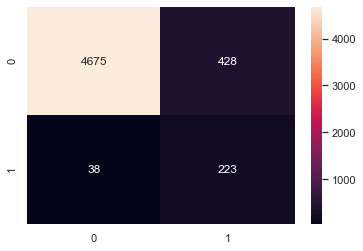

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred_text_test = pd.DataFrame(mnb.predict(X_text_test), columns=['prediction'], index=y_text_test.index)

print("Accuracy:\t", mnb.score(X_text_test, y_text_test))
print("F1 score:\t", f1_score(y_text_test, pred_text_test))
sb.heatmap(confusion_matrix(y_text_test, pred_text_test), annot=True, fmt='d')

## NLP Strongest Predictors

Uses the properties of the CountVectorizer and MNB object to find which words are the strongest predictor of being fraudulent. It calculates a ratio between 2 coefficients in the MNB model, such that the smaller the ratio, the stronger a predictor for being false.

In [13]:
vocab_array_words = [(x) for x, y in cv.vocabulary_.items()]
vocab_array_index = [(y) for x, y in cv.vocabulary_.items()]

In [14]:
feature_importance = pd.DataFrame(mnb.feature_log_prob_)
feature_importance = feature_importance.transpose()
feature_importance['words']= pd.Series(vocab_array_words, index=vocab_array_index)
feature_importance.head()

,0,1,words
0,-10.990353,-12.731519,00 00
1,-14.486861,-13.830131,00 000
2,-13.793714,-13.830131,00 00pay
3,-14.486861,-13.830131,00 00please
4,-14.486861,-13.830131,00 00pm


In [15]:
feature_importance['ratio'] = feature_importance[1] / feature_importance[0]
feature_importance.sort_values('ratio', axis=0, ascending=True, inplace=True)
feature_importance.head(20)

,0,1,words,ratio
37941,-15.180008,-9.001817,aker solution,0.593005
61549,-15.180008,-9.435682,aptitude staff,0.621586
573517,-15.180008,-9.640476,people 30,0.635077
104151,-15.180008,-9.640476,bring discovery,0.635077
623501,-15.180008,-9.640476,production maximize,0.635077
843638,-15.180008,-9.640476,url 0fa3f7c5e23a16de16a841e368006cae916884407d...,0.635077
657527,-15.180008,-9.640476,recovery petroleum,0.635077
317210,-15.180008,-9.640476,field employ,0.635077
1133,-15.180008,-9.640476,0fa3f7c5e23a16de16a841e368006cae916884407d90b1...,0.635077
581618,-15.180008,-9.640476,petroleum field,0.635077


## Decision Tree

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

print("X_train:\t", len(X_train))
print("X_test:\t\t", len(X_test))
print("Y_train:\t", len(Y_train))
print("Y_test:\t\t", len(Y_test))

X_train:	 12516
X_test:		 5364
Y_train:	 12516
Y_test:		 5364


In [17]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

f1_score:	 0.8258064516129032
0.9798657718120806


<AxesSubplot:>

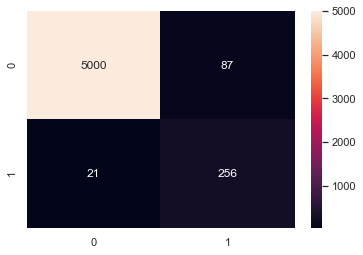

In [18]:
test_pred = pd.DataFrame(dectree.predict(X_test), columns=['prediction'], index=Y_test.index)
test_results = pd.concat([Y_test, test_pred], axis=1)

print("f1_score:\t", f1_score(Y_test, test_pred))
print(dectree.score(X_test, Y_test))

sb.heatmap(confusion_matrix(Y_test, test_pred), annot=True, fmt='d')

f1_score:	 0.8111888111888113
0.9805848513902206


<AxesSubplot:>

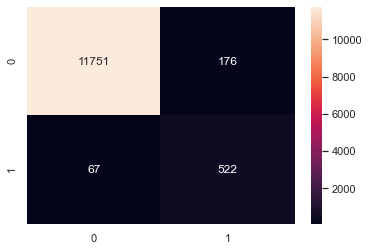

In [19]:
train_pred = pd.DataFrame(dectree.predict(X_train), columns=['prediction'], index=Y_train.index)
train_results = pd.concat([Y_train, train_pred], axis=1)

print("f1_score:\t", f1_score(Y_train, train_pred))
print(dectree.score(X_train, Y_train))

sb.heatmap(confusion_matrix(Y_train, train_pred), annot=True, fmt='d')

Annotation(3348, 5707.8, 'NLP_Pred <= 1.0\ngini = 0.09\nsamples = 12516\nvalue = [11927, 589]\nclass = 0')
Annotation(3348, 5707.8, 'NLP_Pred <= 0.0\ngini = 0.01\nsamples = 11751\nvalue = [11692, 59]\nclass = 0')
Annotation(1674, 4077, 'industry_Executive Office <= 0.5\ngini = 0.003\nsamples = 11422\nvalue = [11402, 20]\nclass = 0')
Annotation(837, 2446.2, 'gini = 0.003\nsamples = 11415\nvalue = [11396, 19]\nclass = 0')
Annotation(837, 2446.2, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0')
Annotation(1674, 4077, 'industry_Accounting <= 0.5\ngini = 0.209\nsamples = 329\nvalue = [290, 39]\nclass = 0')
Annotation(2511, 2446.2, 'gini = 0.181\nsamples = 319\nvalue = [287, 32]\nclass = 0')
Annotation(2511, 2446.2, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = 1')
Annotation(3348, 5707.8, 'country_code_is_US <= 0.5\ngini = 0.426\nsamples = 765\nvalue = [235, 530]\nclass = 1')
Annotation(5022, 4077, 'has_company_logo <= 0.5\ngini = 0.483\nsamples = 177\nvalue = [105, 72]\nclass 

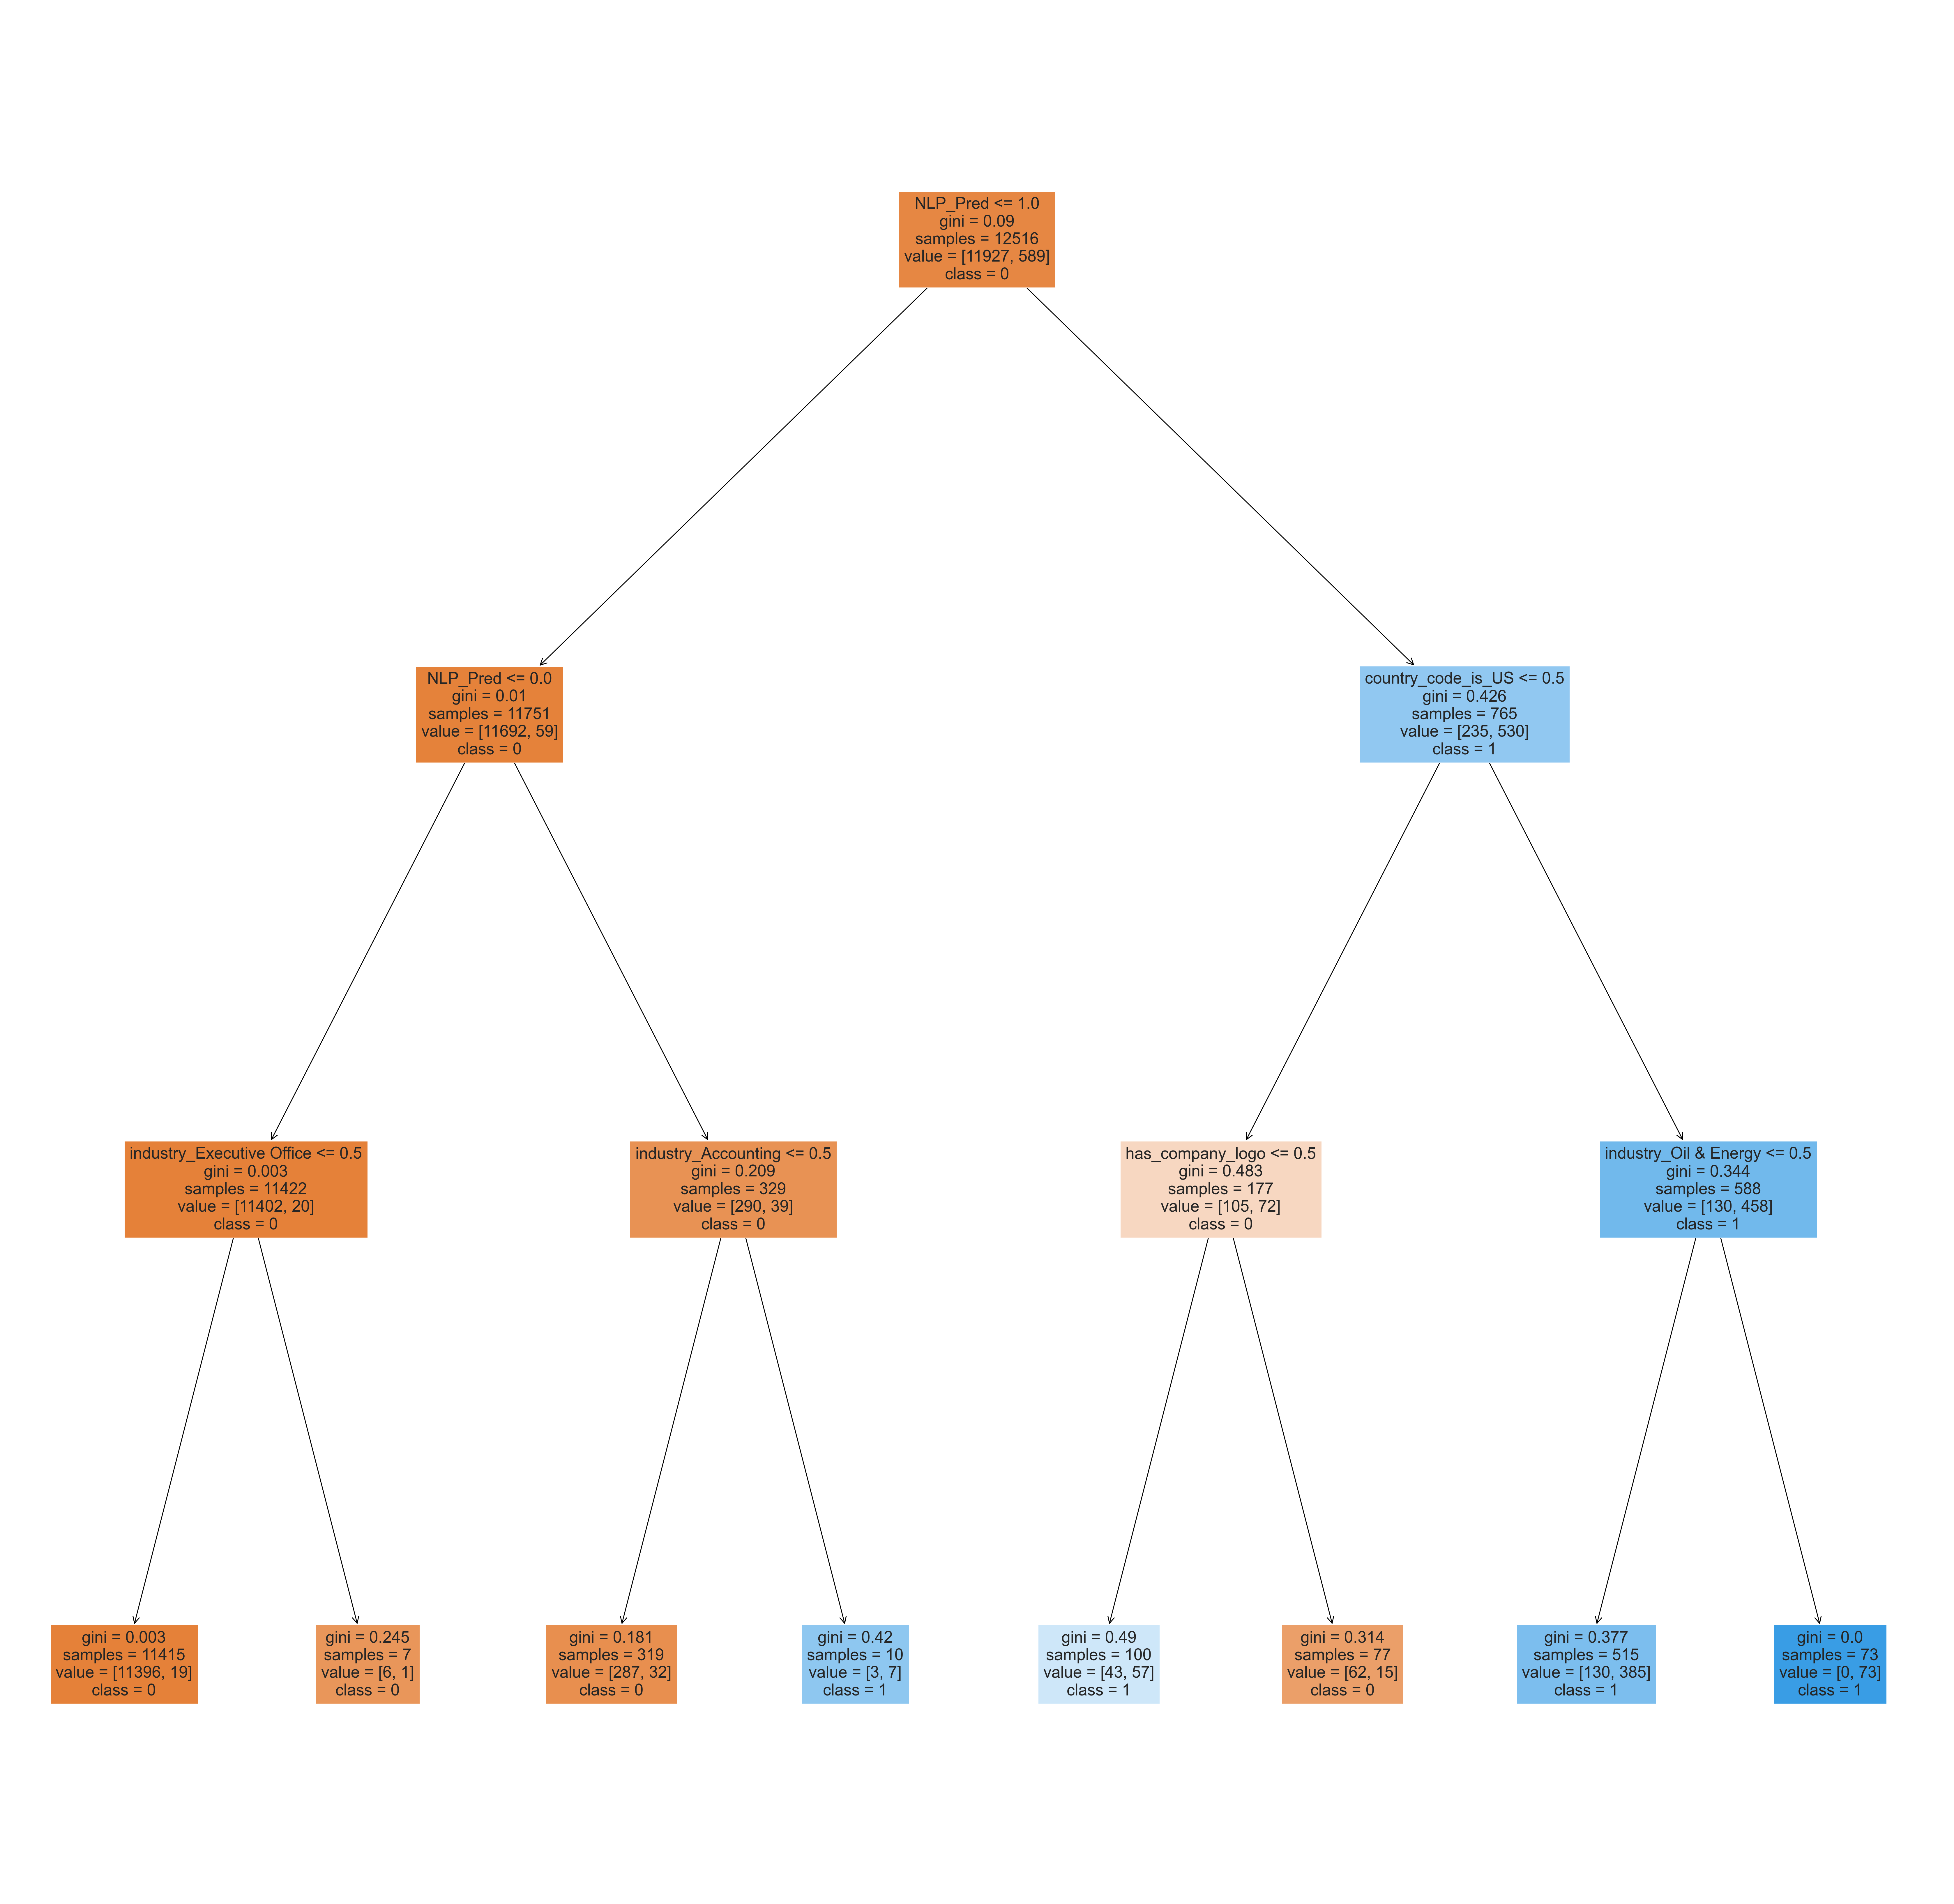

In [20]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(120, 120))
out = plot_tree(dectree, 
          feature_names = X_data.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    print(o)
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

## Logistic Regression

Uses the logistic regression model. However, the default model does not perform well on imbalanced data. The current data set has 95% of values in 1 class, which will affect the model. Hence, additional weightage must be applied to the 'fraudulent' class. 

This increases cost associated with predicting a fraudulent class wrongly in the cost function. The model now values getting a fraudulent prediction correct more than getting a not-fraudulent prediction wrong.

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

print("X_train:\t", len(X_train))
print("X_test:\t\t", len(X_test))
print("Y_train:\t", len(Y_train))
print("Y_test:\t\t", len(Y_test))

X_train:	 12516
X_test:		 5364
Y_train:	 12516
Y_test:		 5364


In [22]:
from sklearn.linear_model import LogisticRegression

#Uses a weightage of 1:16
logreg = LogisticRegression(class_weight={0: 1, 1: 16})
logreg.fit(X_train, Y_train['fraudulent'])

LogisticRegression(class_weight={0: 1, 1: 16})

f1_score:	 0.5468451242829828
0.9558165548098434


<AxesSubplot:>

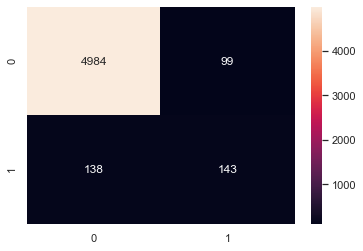

In [23]:
test_pred = pd.DataFrame(logreg.predict(X_test), columns=['prediction'], index=Y_test.index)
test_results = pd.concat([Y_test, test_pred], axis=1)

print("f1_score:\t", f1_score(Y_test, test_pred))
print(logreg.score(X_test, Y_test))

sb.heatmap(confusion_matrix(Y_test, test_pred), annot=True, fmt='d')

f1_score:	 0.5217391304347827
0.9534196228827101


<AxesSubplot:>

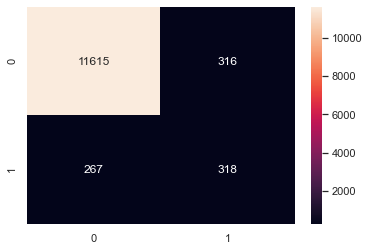

In [24]:
train_pred = pd.DataFrame(logreg.predict(X_train), columns=['prediction'], index=Y_train.index)
train_results = pd.concat([Y_train, train_pred], axis=1)

print("f1_score:\t", f1_score(Y_train, train_pred))
print(logreg.score(X_train, Y_train))

sb.heatmap(confusion_matrix(Y_train, train_pred), annot=True, fmt='d')